# Data Mining Group 5
## Factors influencing Semiconductor Crisis
By:Terry Zhang, Linxi Wu, Iliyana Staneva, Kartik Garg


### Importing modules and dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


In [2]:
df = pd.read_csv('Semiconductor shortage affects.csv')
df.head()

,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,1/1/1985,100.5,NaN,NaN,670.8,NaN,5.5335,NaN,NaN,81.4300
1,1/2/1985,100.8,NaN,NaN,665.6,NaN,5.3861,NaN,NaN,81.4319
2,1/3/1985,100.9,169.0,141.6,660.9,223.9,5.3103,69.2,76.2,82.1699
3,1/4/1985,100.6,NaN,NaN,653.9,NaN,5.1255,NaN,NaN,81.9731
4,1/5/1985,100.1,NaN,NaN,647.2,NaN,5.0821,NaN,NaN,82.1311


## Preliminary EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 10 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                       --------------  -----  
 0   DATE                                                                                                                         443 non-null    object 
 1   Producer Price Index(By  Industry in $)                                                                                      443 non-null    float64
 2   Export Price Index(End Use of semiconductors)                                                                                370 non-null    float64
 3   Import Price Index(in $ End Use of semiconductors)                                                                      

In [4]:
df.drop([442], inplace = True) # Dropping 2021 data as it is null for most features
df.isna().sum()

DATE                                                                                                                            0
Producer Price Index(By  Industry in $)                                                                                         0
Export Price Index(End Use of semiconductors)                                                                                  72
Import Price Index(in $ End Use of semiconductors)                                                                             72
No. of employed peoples in semiconductor industry                                                                               0
Export Price Index (End use excluding without semiconductors)                                                                  72
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)                                      0
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semicon

In [5]:
# Renaming columns to only important names
df = df.rename(
    columns = {'Producer Price Index(By  Industry in $)':'ProducerPriceIndex',
           'Export Price Index(End Use of semiconductors)':'ExportPriceIndex',
           'Import Price Index(in $ End Use of semiconductors)':'ImportPriceIndex',
           'No. of employed peoples in semiconductor industry':'PeopleEmployed',
           'Export Price Index (End use excluding without semiconductors)':'ExportPriceIndexExcluding',
           'Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)':'RelativeImportanceWeights',
           'Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors':'EndUse-ExportPriceIndex',
            'Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors':'EndUse-ImportPriceIndex',
           'Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors':'IndustrialProduction'
          })

df.head()

,DATE,ProducerPriceIndex,ExportPriceIndex,ImportPriceIndex,PeopleEmployed,ExportPriceIndexExcluding,RelativeImportanceWeights,EndUse-ImportPriceIndex,EndUse-ExportPriceIndex,IndustrialProduction
0,1/1/1985,100.5,NaN,NaN,670.8,NaN,5.5335,NaN,NaN,81.4300
1,1/2/1985,100.8,NaN,NaN,665.6,NaN,5.3861,NaN,NaN,81.4319
2,1/3/1985,100.9,169.0,141.6,660.9,223.9,5.3103,69.2,76.2,82.1699
3,1/4/1985,100.6,NaN,NaN,653.9,NaN,5.1255,NaN,NaN,81.9731
4,1/5/1985,100.1,NaN,NaN,647.2,NaN,5.0821,NaN,NaN,82.1311


In [6]:
df.shape

(442, 10)

In [7]:
df.fillna(method='bfill', inplace = True)
df.head()

,DATE,ProducerPriceIndex,ExportPriceIndex,ImportPriceIndex,PeopleEmployed,ExportPriceIndexExcluding,RelativeImportanceWeights,EndUse-ImportPriceIndex,EndUse-ExportPriceIndex,IndustrialProduction
0,1/1/1985,100.5,169.0,141.6,670.8,223.9,5.5335,69.2,76.2,81.4300
1,1/2/1985,100.8,169.0,141.6,665.6,223.9,5.3861,69.2,76.2,81.4319
2,1/3/1985,100.9,169.0,141.6,660.9,223.9,5.3103,69.2,76.2,82.1699
3,1/4/1985,100.6,169.6,147.5,653.9,220.9,5.1255,70.3,76.8,81.9731
4,1/5/1985,100.1,169.6,147.5,647.2,220.9,5.0821,70.3,76.8,82.1311


## Data Cleaning and Aggregation

In [8]:
production = []
df['year'] = pd.DatetimeIndex(df['DATE']).year

for i in range(1985,2021):
    x = df.where(df['year'] == i).dropna()['IndustrialProduction'].sum()
    production.append(x)

production = zip(range(1985,2021), production)
production = pd.DataFrame(production)
production = production.rename(columns = {0: 'year',1: 'production'})
production.head(3)

,year,production
0,1985,986.3140
1,1986,1010.2932
2,1987,1057.8092


In [9]:
columns = df.columns
columns = columns.drop(['DATE', 'IndustrialProduction', 'year'])
columns

# same for the ProducerPriceIndex
for j in columns:
    k = []
    for i in range(1985,2021):
        x = df.where(df['year'] == i).dropna()[j].mean()
        k.append(x)
    production = production.join(pd.DataFrame(k, columns=[j]))

In [10]:
GDP = pd.read_csv('china-gdp-growth-rate.csv')
GDP.tail(5)
GDP = pd.DataFrame(GDP.drop(['year'], axis = 1))

production = production.join(GDP)
production.head()

,year,production,ProducerPriceIndex,ExportPriceIndex,ImportPriceIndex,PeopleEmployed,ExportPriceIndexExcluding,RelativeImportanceWeights,EndUse-ImportPriceIndex,EndUse-ExportPriceIndex,China GDP Growth (%),US GDP Growth (%)
0,1985,986.3140,100.525000,164.575,140.975,635.758333,221.025,5.088275,71.300,76.625,13.4307,4.1697
1,1986,1010.2932,102.441667,158.625,139.300,601.550000,218.475,5.103667,80.100,77.550,8.9500,3.4627
2,1987,1057.8092,102.633333,160.175,144.350,593.216667,210.650,5.566208,88.825,79.175,11.6574,3.4596
3,1988,1104.2269,104.033333,154.125,155.725,611.575000,211.000,5.640083,94.875,81.900,11.2226,4.1770
4,1989,1111.1314,105.108333,147.625,162.400,601.433333,208.050,5.467842,95.925,85.275,4.2063,3.6727


## EDA on the final data

<AxesSubplot:xlabel='year', ylabel='production'>

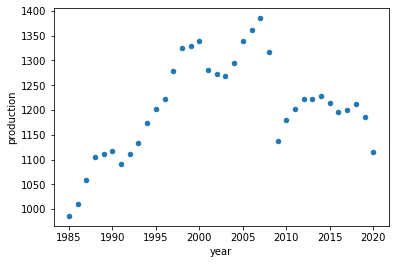

In [11]:
production.plot.scatter(x= 'year', y='production')

<AxesSubplot:xlabel='year', ylabel='China  GDP Growth (%)'>

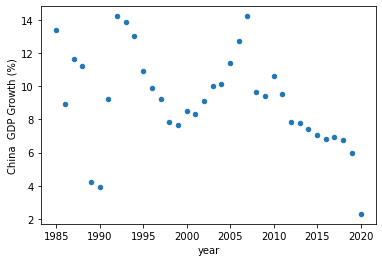

In [12]:
production.plot.scatter(x= 'year', y='China  GDP Growth (%)')

<AxesSubplot:xlabel='year', ylabel='US GDP Growth (%)'>

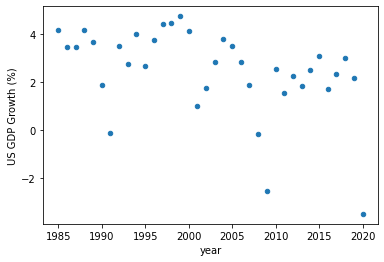

In [13]:
production.plot.scatter(x= 'year', y='US GDP Growth (%)')

<AxesSubplot:>

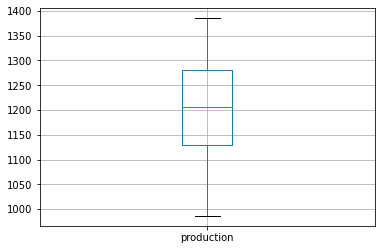

In [14]:
production[['production']].boxplot()

<AxesSubplot:>

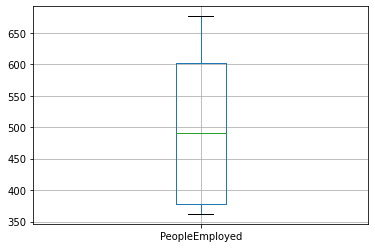

In [15]:
production[['PeopleEmployed']].boxplot()

<AxesSubplot:>

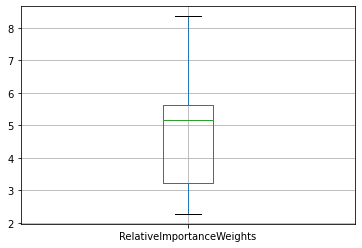

In [16]:
production[['RelativeImportanceWeights']].boxplot()

<AxesSubplot:>

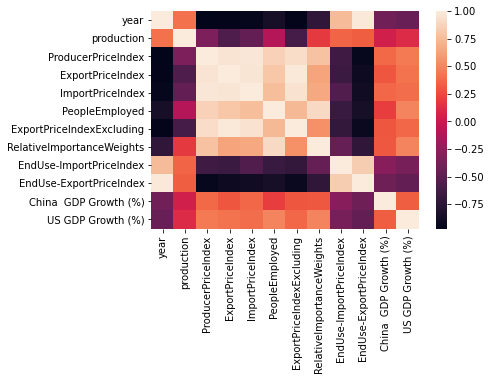

In [17]:
import seaborn as sb
sb.heatmap(production.corr())

### Findings:

We could see that those variables in the middle have a high correlation with each other.

Based on the economic analysis and understanding of te industry, production is almost always catching up with demand in semiconductor industry. We need to drop those variables that are highly related to the key variables: 

'ExportPriceIndex', 'ImportPriceIndex', 'ExportPriceIndexExcluding', 'EndUse-ExportPriceIndex'

## Feature Selection based on EDA

In [18]:
production = production.drop(['ExportPriceIndex', 'ImportPriceIndex', 'ExportPriceIndexExcluding', 
                              'EndUse-ExportPriceIndex'], axis = 1)

production.columns

Index(['year', 'production', 'ProducerPriceIndex', 'PeopleEmployed',
       'RelativeImportanceWeights', 'EndUse-ImportPriceIndex',
       'China  GDP Growth (%)', 'US GDP Growth (%)'],
      dtype='object')

<AxesSubplot:>

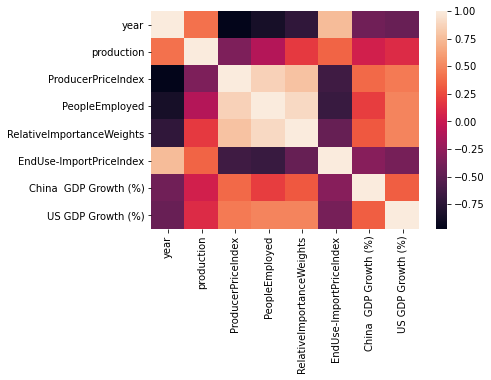

In [19]:
sb.heatmap(production.corr())

#### Now we spliting our data into three different dataset based on the three anomalies detected based on the scatter plot of semoconductor "production".

The three split will be from

* 1985 - 2001 (2001 for testing)
* 2001 - 2008 (2008 for testing)
* 2008 - 20020 (2019 and 2020 for testing)

In [20]:
p2 = production.copy()
p2 = p2.set_index("year")
p2.head(3)

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
1985,986.3140,100.525000,635.758333,5.088275,71.300,13.4307,4.1697
1986,1010.2932,102.441667,601.550000,5.103667,80.100,8.9500,3.4627
1987,1057.8092,102.633333,593.216667,5.566208,88.825,11.6574,3.4596


In [21]:
production_before_2001 = p2[0:16][:].copy()
production_2001 = p2[16:17][:].copy()
production_between_2001_to_2007 = p2[16:23][:].copy()
production_2008 = p2[23:24][:].copy()
production_between_2009_to_2018 = p2[24:34][:].copy()
production_2019_2020 = p2[34:36][:].copy()

In [22]:
production_before_2001.tail(2)

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
1999,1328.5580,90.091667,630.608333,8.359458,101.333333,7.6617,4.7532
2000,1340.0753,88.758333,676.225000,8.258425,100.008333,8.4901,4.1275


In [23]:
production_2001

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
2001,1281.3495,86.383333,645.225,6.442067,98.866667,8.3357,0.9983


In [24]:
production_between_2001_to_2007.tail(2)

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
2006,1361.9636,75.141667,457.85,4.702450,102.816667,12.7210,2.8550
2007,1385.1755,70.200000,447.50,4.410183,105.633333,14.2309,1.8762


In [25]:
production_2008

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
2008,1316.7456,66.266667,431.75,4.221858,110.183333,9.6507,-0.1366


In [26]:
production_between_2009_to_2018.tail(2)

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
2017,1199.9999,56.808333,362.158333,2.390467,112.991667,6.9472,2.3327
2018,1211.1503,55.975000,369.125000,2.279058,113.566667,6.7498,2.9965


In [27]:
production_2019_2020

,production,ProducerPriceIndex,PeopleEmployed,RelativeImportanceWeights,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,,,
2019,1185.2526,55.341667,375.975000,2.307908,113.850000,5.9497,2.1612
2020,1116.1598,54.766667,370.166667,2.375225,114.758333,2.3000,-3.4861


# Model Building


In [28]:
# Get all the target for the different time
y_before_2001 = production_before_2001[['production']]
y_2001 = production_2001[['production']]
y_between_2001_to_2007 = production_between_2001_to_2007[['production']]
y_2008 = production_2008[['production']]
y_between_2009_to_2018 = production_between_2009_to_2018[['production']]
y_2019_2020 = production_2019_2020[['production']]


## production_before_2001

In [29]:
# train Ordinary Least Squares model
production_before_2001 = sm.add_constant(production_before_2001)
model_before_2001 = sm.OLS(y_before_2001, production_before_2001.drop(['production'], axis = 1))
result_before_2001 = model_before_2001.fit()

print(result_before_2001.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.73e-08
Time:                        22:32:24   Log-Likelihood:                -60.719
No. Observations:                  16   AIC:                             135.4
Df Residuals:                       9   BIC:                             140.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\gargk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Drop the variable with big P_value: 
#### 'PeopleEmployed', 'RelativeImportanceWeights'

In [30]:
model_before_2001 = sm.OLS(y_before_2001, production_before_2001.drop(['production', 'PeopleEmployed', 'RelativeImportanceWeights'], axis = 1))
result_before_2001 = model_before_2001.fit()

print(result_before_2001.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.30e-10
Time:                        22:32:24   Log-Likelihood:                -61.776
No. Observations:                  16   AIC:                             133.6
Df Residuals:                      11   BIC:                             137.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

C:\Users\gargk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
x_2001_pred = sm.add_constant(production_2001.drop(['production', 'PeopleEmployed', 'RelativeImportanceWeights'], axis = 1), has_constant='add')
y_2001_pred = result_before_2001.predict(x_2001_pred)
y_2001_pred

C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


year
2001    1323.585914
dtype: float64

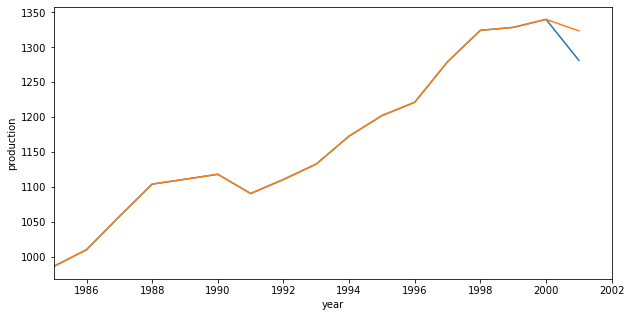

In [32]:
# Series 

series1 = pd.concat([y_before_2001, y_2001], ignore_index=True)
series2 = pd.concat([y_before_2001, pd.DataFrame(y_2001_pred, columns = ['production'])], ignore_index=True)

series1 = series1.join(pd.DataFrame(range(1985,2002)))
series1 = series1.rename(columns = {0: 'year'})
series1 = series1.set_index('year')

series2 = series2.join(pd.DataFrame(range(1985,2002)))
series2 = series2.rename(columns = {0: 'year'})
series2 = series2.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(1985, 2002)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series1)
plt.plot(series2)

In [33]:
print("Predicted vs Actual Difference: ", 
      pd.DataFrame(y_2001_pred).iloc[0][0] - y_2001.iloc[0][0])

Predicted vs Actual Difference:  42.236414069942384


### VAR model

In [34]:
df_train= production_before_2001.drop(['const', 'ProducerPriceIndex', 
                                       'PeopleEmployed', 
                                       'RelativeImportanceWeights'], axis = 1)
df_train.head()

,production,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,
1985,986.3140,71.300,13.4307,4.1697
1986,1010.2932,80.100,8.9500,3.4627
1987,1057.8092,88.825,11.6574,3.4596
1988,1104.2269,94.875,11.2226,4.1770
1989,1111.1314,95.925,4.2063,3.6727


In [35]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "production" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.3004
 No. Lags Chosen       = 6
 Critical value 1%     = -4.473
 Critical value 5%     = -3.29
 Critical value 10%    = -2.772
 => P-Value = 0.9966. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EndUse-ImportPriceIndex" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7263
 No. Lags Chosen       = 6
 Critical value 1%     = -4.473
 Critical value 5%     = -3.29
 Critical value 10%    = -2.772
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "China  GDP Growth (%)" 
    -----------------------------------------------
 Null Hypothesis: Da

In [36]:
model = VAR(df_train)
for i in [1,2]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  7.910363930076546
BIC :  8.854430864879493
FPE :  3029.9033055960285
HQIC:  7.900307644613598 

Lag Order = 2
AIC :  8.301862084982098
BIC :  9.945152361135621
FPE :  10543.13436641706
HQIC:  8.149745531551403 



C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [37]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,14.95,15.13,3.110e+06,14.93
1,7.522*,8.435*,2108.*,7.437*
2,8.302,9.945,1.054e+04,8.150


In [38]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Mar, 2022
Time:                     22:32:24
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    8.85443
Nobs:                     15.0000    HQIC:                   7.90031
Log likelihood:          -124.464    FPE:                    3029.90
AIC:                      7.91036    Det(Omega_mle):         958.680
--------------------------------------------------------------------
Results for equation production
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                            -17.468530        76.480708           -0.228           0.819
L1.production                      0.989935         0.118378            8.362           0.000
L1.

In [39]:
lag_order = model_fitted.k_ar
# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
nobs = 1
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=[2001], columns=df_train.columns)
df_forecast

,production,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
2001,1358.513464,97.778542,9.260712,5.360551


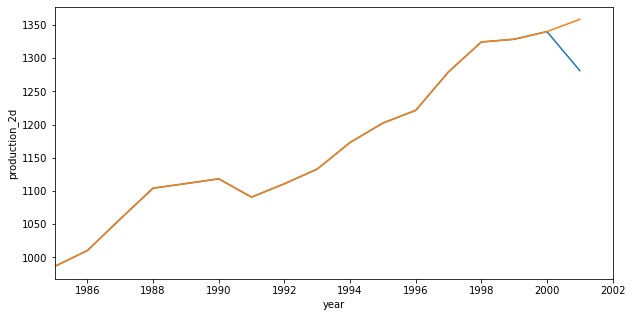

In [40]:
# Series
y_2001_pred = df_forecast['production']
series1 = pd.concat([y_before_2001, y_2001], ignore_index=True)
series2 = pd.concat([y_before_2001, pd.DataFrame(y_2001_pred, columns = ['production'])], ignore_index=True)

series1 = series1.join(pd.DataFrame(range(1985,2002)))
series1 = series1.rename(columns = {0: 'year'})
series1 = series1.set_index('year')

series2 = series2.join(pd.DataFrame(range(1985,2002)))
series2 = series2.rename(columns = {0: 'year'})
series2 = series2.set_index('year')
plt.figure(figsize=(10, 5))
plt.xlim(1985, 2002)
plt.xlabel('year')
plt.ylabel('production_2d')
plt.plot(series1)
plt.plot(series2)

In [41]:
print("Predicted vs Actual Difference: ", 
      pd.DataFrame(y_2001_pred).iloc[0][0] - y_2001.iloc[0][0])

Predicted vs Actual Difference:  77.1639642381308


The model performs as expected as this model tries to forecast the trend of semiconductor production without the impact of the dotcom burst of 2001

### Random Forest

In [42]:
train = production_before_2001.drop(['const', 'PeopleEmployed', 
                                     'RelativeImportanceWeights'], axis = 1)

train.head()

,production,ProducerPriceIndex,EndUse-ImportPriceIndex,China GDP Growth (%),US GDP Growth (%)
year,,,,,
1985,986.3140,100.525000,71.300,13.4307,4.1697
1986,1010.2932,102.441667,80.100,8.9500,3.4627
1987,1057.8092,102.633333,88.825,11.6574,3.4596
1988,1104.2269,104.033333,94.875,11.2226,4.1770
1989,1111.1314,105.108333,95.925,4.2063,3.6727


In [43]:
train_features = train.iloc[:,1:]
train_labels = train.iloc[:,0]
test_features = production_2001[train_features.columns]

In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [45]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

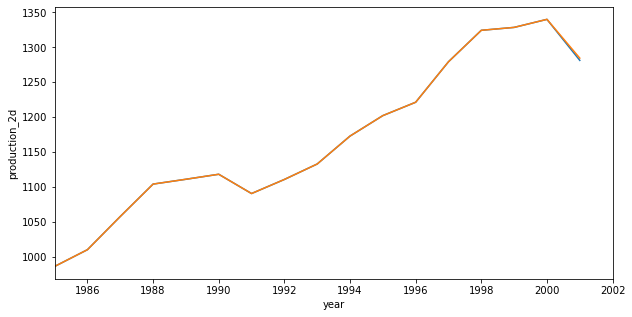

In [46]:
# Series 
series1 = pd.concat([y_before_2001, y_2001], ignore_index=True)
series2 = pd.concat([y_before_2001, pd.DataFrame(predictions, columns = ['production'])], ignore_index=True)

series1 = series1.join(pd.DataFrame(range(1985,2002)))
series1 = series1.rename(columns = {0: 'year'})
series1 = series1.set_index('year')

series2 = series2.join(pd.DataFrame(range(1985,2002)))
series2 = series2.rename(columns = {0: 'year'})
series2 = series2.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(1985, 2002)
plt.xlabel('year')
plt.ylabel('production_2d')
plt.plot(series1)
plt.plot(series2)

Here, we can see that the model is overfitting as the predicted value is very close to the actual value.

In [47]:
feature_list = list(train_features.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ProducerPriceIndex   Importance: 0.68
Variable: EndUse-ImportPriceIndex Importance: 0.21
Variable: US GDP Growth (%)    Importance: 0.08
Variable: China  GDP Growth (%) Importance: 0.03


### Here, again the ProducerPriceIndex ,EndUse-ImportPriceIndex and US GDP Growth (%) come as top features for our model which validates our hypothesis from the OLS model.

So, we choose the OLS model as it performs the best for our use case.

## production_between_2001_to_2007

In [48]:
# train Ordinary Least Squares model
production_between_2001_to_2007 = sm.add_constant(production_between_2001_to_2007)
model_between_2001_to_2007 = sm.OLS(y_between_2001_to_2007, production_between_2001_to_2007.drop(['production','PeopleEmployed', 'RelativeImportanceWeights'], axis = 1))
result_between_2001_to_2007 = model_between_2001_to_2007.fit()

print(result_between_2001_to_2007.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     28.93
Date:                Tue, 15 Mar 2022   Prob (F-statistic):             0.0337
Time:                        22:32:25   Log-Likelihood:                -22.049
No. Observations:                   7   AIC:                             54.10
Df Residuals:                       2   BIC:                             53.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [49]:
x_2008_pred = sm.add_constant(production_2008.drop(['production', 'PeopleEmployed', 'RelativeImportanceWeights'], axis = 1), has_constant='add')
y_2008_pred = result_between_2001_to_2007.predict(x_2008_pred)
y_2008_pred

C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


year
2008    1333.216204
dtype: float64

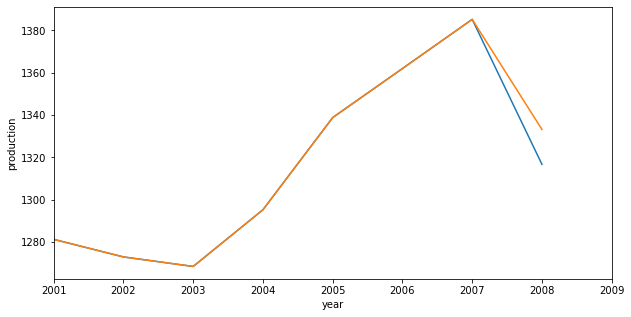

In [50]:
# Series 

series3 = pd.concat([y_between_2001_to_2007, y_2008], ignore_index=True)
series4 = pd.concat([y_between_2001_to_2007, pd.DataFrame(y_2008_pred, columns = ['production'])], ignore_index=True)

series3 = series3.join(pd.DataFrame(range(2001,2009)))
series3 = series3.rename(columns = {0: 'year'})
series3 = series3.set_index('year')

series4 = series4.join(pd.DataFrame(range(2001,2009)))
series4 = series4.rename(columns = {0: 'year'})
series4 = series4.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(2001, 2009)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series3)
plt.plot(series4)

In [51]:
print("Predicted vs Actual Difference: ", 
      pd.DataFrame(y_2008_pred).iloc[0][0] - y_2008.iloc[0][0])

Predicted vs Actual Difference:  16.47060400710211


## production_between_2009_to_2018

In [52]:
production_between_2009_to_2018 = sm.add_constant(production_between_2009_to_2018)
model_between_2009_to_2018 = sm.OLS(y_between_2009_to_2018, production_between_2009_to_2018.drop(['production','PeopleEmployed', 'RelativeImportanceWeights', 'China  GDP Growth (%)'], axis = 1))
result_between_2009_to_2018 = model_between_2009_to_2018.fit()

print(result_between_2009_to_2018.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     328.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.85e-07
Time:                        22:32:25   Log-Likelihood:                -20.885
No. Observations:                  10   AIC:                             49.77
Df Residuals:                       6   BIC:                             50.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\gargk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [53]:
x_2019_2020_pred = sm.add_constant(production_2019_2020.drop(['production', 'PeopleEmployed', 'RelativeImportanceWeights','China  GDP Growth (%)'], axis = 1), has_constant='add')
y_2019_2020_pred = result_between_2009_to_2018.predict(x_2019_2020_pred)
y_2019_2020_pred

C:\Users\gargk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


year
2019    1207.841536
2020    1177.422198
dtype: float64

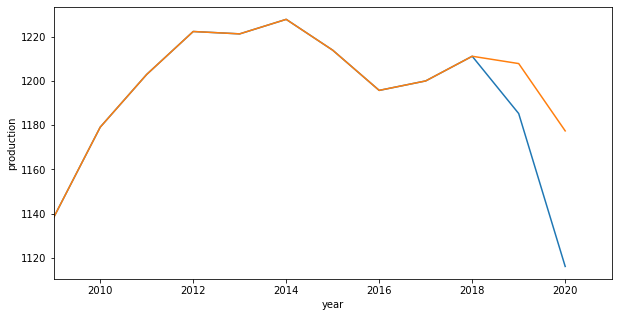

In [54]:
series5 = pd.concat([y_between_2009_to_2018, y_2019_2020], ignore_index=True)
series6 = pd.concat([y_between_2009_to_2018, pd.DataFrame(y_2019_2020_pred, columns = ['production'])], ignore_index=True)

series5 = series5.join(pd.DataFrame(range(2009,2021)))
series5 = series5.rename(columns = {0: 'year'})
series5 = series5.set_index('year')

series6 = series6.join(pd.DataFrame(range(2009,2021)))
series6 = series6.rename(columns = {0: 'year'})
series6 = series6.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(2009, 2021)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series5)
plt.plot(series6)

## Real Effect 

### Dotcom bust:
Now lets try to analyze what would have been the scenario without the dotcom burst

#### To predict the real effect using the average of the change from past year to generate the X-variable if there is no impact from history

Let's predict the real effects of all three events with predicted X-variables:

We tried to get the predicted X-variable assuming there is no interruption and the X-variable is what follows the averaged growth rate based on data in the preceding years.

Here we manually imputed the data previous years to analyze the model without the dotcom burst

In [55]:
X_2001_pred = pd.DataFrame(data = {'ProducerPriceIndex':[85.18583333], 
                                   'EndUse-ImportPriceIndex':[96.20333333],
                                  'China  GDP Growth (%)':[7.29941], 
                                   'US GDP Growth (%)':[4.62116]})
X_2001_pred = sm.add_constant(X_2001_pred, has_constant='add')
production_X_2001_pred = result_before_2001.predict(X_2001_pred) 

print("Predicted production: ",production_X_2001_pred.iloc[0])

Predicted production:  1364.0179309273353


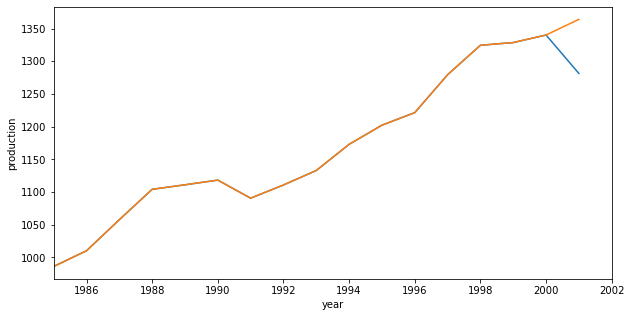

In [56]:
series2 = pd.concat([y_before_2001, pd.DataFrame(data = {'production': [production_X_2001_pred.iloc[0]]})], ignore_index=True)
series2 = series2.join(pd.DataFrame(range(1985,2002)))
series2 = series2.rename(columns = {0: 'year'})
series2 = series2.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(1985, 2002)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series1)
plt.plot(series2)

In [57]:
print("Predicted vs Actual Difference: ", 
      series2.iloc[-1] - series1.iloc[-1])

Predicted vs Actual Difference:  production    82.668431
Name: 2001, dtype: float64


### 2008 financial crisis

In [58]:
X_2008_pred = pd.DataFrame(data = {'ProducerPriceIndex':[68.76916667], 'EndUse-ImportPriceIndex':[107.1475],
                                  'China  GDP Growth (%)':[14.99758], 'US GDP Growth (%)':[2.10673]})
X_2008_pred = sm.add_constant(X_2008_pred, has_constant='add')
production_X_2008_pred = result_between_2001_to_2007.predict(X_2008_pred) 

print("Predicted production: ",production_X_2008_pred)

Predicted production:  0    1415.561779
dtype: float64


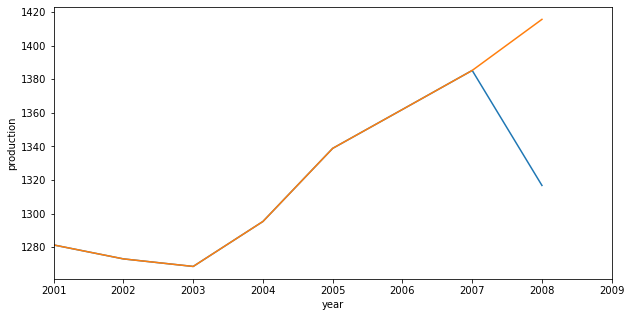

In [59]:
series4 = pd.concat([y_between_2001_to_2007, pd.DataFrame(data = {'production': [production_X_2008_pred.iloc[0]]})], ignore_index=True)
series4 = series4.join(pd.DataFrame(range(2001, 2009)))
series4 = series4.rename(columns = {0: 'year'})
series4 = series4.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(2001, 2009)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series3)
plt.plot(series4)

In [60]:
print("Predicted vs Actual Difference: ", 
      series4.iloc[-1] - series3.iloc[-1])

Predicted vs Actual Difference:  production    98.816179
Name: 2008, dtype: float64


### Covid-19

In [61]:
X_2019_2020_pred = pd.DataFrame(data = {'ProducerPriceIndex':[55.3025, 54.5045],
                                        'EndUse-ImportPriceIndex':[111.8825, 111.6451667],
                                        'US GDP Growth (%)':[2.58788, 2.633754]})
X_2019_2020_pred = sm.add_constant(X_2019_2020_pred, has_constant='add')
production_X_2019_2020_pred = result_between_2009_to_2018.predict(X_2019_2020_pred) 


print("Predicted production: ",production_X_2019_2020_pred)

Predicted production:  0    1196.758147
1    1196.735508
dtype: float64


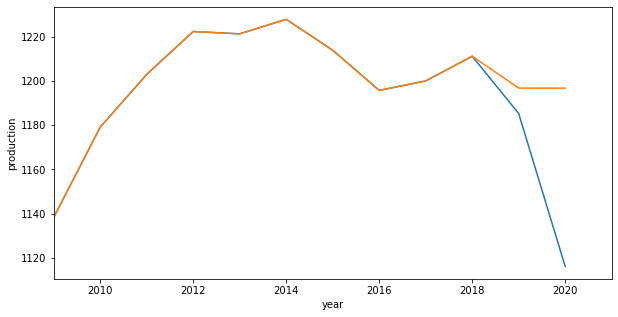

In [62]:
series6 = pd.concat([y_between_2009_to_2018, pd.DataFrame(data = {'production': [production_X_2019_2020_pred.iloc[0], production_X_2019_2020_pred.iloc[1]]})], ignore_index=True)
series6 = series6.join(pd.DataFrame(range(2009,2021)))
series6 = series6.rename(columns = {0: 'year'})
series6 = series6.set_index('year')

plt.figure(figsize=(10, 5))
plt.xlim(2009, 2021)
plt.xlabel('year')
plt.ylabel('production')
plt.plot(series5)
plt.plot(series6)

In [63]:
print("Predicted vs Actual Difference: ", 
      series6.iloc[-1] - series5.iloc[-1])

Predicted vs Actual Difference:  production    80.575708
Name: 2020, dtype: float64


This concludes our analysis that ProducerPriceIndex ,EndUse-ImportPriceIndex and US GDP Growth (%)  actually have a significant impact on the production of semiconductors.